In [21]:
#Import important Python libraries to be used during the analysis of Aerofit dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
#Read the dataset from local library

df=pd.read_csv("C:/Users/samaksharma/Downloads/Scaler_DS/07_Descriptive Analytics/Project Aerofit/aerofit.csv")

# 1- Defining Problem Statement and Analysing basic metrics 

Problem Statement: Aerofit, a leading brand in the field of fitness equipment offers 3 types of treadmill. They would like to create a profile of customers whom they can target for their respective treadmills. Based on our data analysis, company would provide a better recommendation to their customers.

In [23]:
# Calculate the shape of date

a=df.ndim
b=df.shape
print(f'This is a {a} dimensional dataset.')
print(f'There are {b[0]} rows and {b[1]} columns in this dataset.')

This is a 2 dimensional dataset.
There are 180 rows and 9 columns in this dataset.


In [24]:
# Glimpse of how the data looks like

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [15]:
# Extract datatypes for all fields

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- We observe that none of the fields ahve null values.
- Product, Gender and MaritalStatus -> String
- Age, Education, Usage, Fitness, Income, Miles -> Integer

In [25]:
# Statistical Summary

round(df.describe(),2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


- The minimum age of customer buying treadmill is 18 and maximum age is 50. Average age of the customer is 28 years.
- Customers buying treadmill have completed education with a range of 12-21 years.
- On an average customer uses the treadmill, 3 times a week. There are some customers using the treadmill daily.
- When customers rated on a scale of 1-5 for fitness level, the median is 3 which indicates average fitness.
- The minimum income for a customer is 29.5K and goes upto 104K. Average income is 53.7K.
- Customers run on an average 103 miles per week on the treadmill. Some customers run for 360 miles in a week.

In [20]:
# Statistical Summary for String

df.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


- There are 3 products by the company.
- Male and Female who are Partnered or Single buy their products.
- KP281 product is sold the maximum number of times. Males dominate the customer market. 
  Customers who are 'partnered' buy the product more than 'Single'

In [233]:
# Creating new categorical column for Usage to divide in the categories of Low(1-2), Medium(3-4) and High (5-7)
# Creating new categorical column for Income to divide in the categories of LIG(29K-50K), MIG(50K-80K) and HIG(80K-110K)
# Creating new categorical column for Age to divide in the categories of 18-22, 23-29, 30-39 and 40-50
# Creating new categorical column for Miles to divide in the categories of 0-60,60-100,100-200 and 200& above

usage_bins=[1,2,4,7]
usage_label=['Low','Medium','High']
df['Usage_Category']=pd.cut(df['Usage'],bins=usage_bins,labels=usage_label)

income_bins=[29000,50000,80000,110000]
income_label=['Low Income Group','Middle Income Group','High Income Group']
df['Income_group']=pd.cut(df['Income'],bins=income_bins,labels=income_label)

age_bin=[15,22,29,39,51]
age_label=['18-22','22-30','30-40','40-50']
df['Age_Group']=pd.cut(df['Age'],bins=age_bin,labels=age_label)

miles_bin=[0,59,99,199,400]
miles_label=['Low','Average','High','Very High']
df['Stamina']=pd.cut(df['Miles'],bins=miles_bin,labels=miles_label)

In [234]:
# Analysing the usage count based on categories

df.groupby('Usage_Category')['Usage_Category'].count()

Usage_Category
Low        33
Medium    121
High       26
Name: Usage_Category, dtype: int64

- Most of the customers use the treadmill for 3-4 days followed by 2 days and we have 24 customers using for 5-7 days.

In [78]:
# Analysing the usage of treadmills based on income group categories

df.groupby(['Income_group','Usage_Category'])['Usage_Category'].count()

Income_group         Usage_Category
Low Income Group     Low               18
                     Medium            60
                     High               5
Middle Income Group  Low               15
                     Medium            54
                     High               8
High Income Group    Low                0
                     Medium             7
                     High              11
Name: Usage_Category, dtype: int64

- As seen above, very few customers from Low Income Group use the treadmill for more than 4 days
- Most of the high income group customers tend to use the treadmill for 5 or more days in a week. Interestingly, 
  all of these high income customers use the treadmill for at least 4 days in a week.

In [82]:
# Analyse the count of customers by Age bracket

df.groupby('Age_Group')['Age'].count()

Age_Group
18-22    24
22-30    89
30-40    50
40-50    17
Name: Age, dtype: int64

- Most of the Aerofit customers are in the range of 22-30 years followed up by 30-40.

In [235]:
# Analyse the count of customers based on stamina

df.groupby('Stamina')['Stamina'].count()

Stamina
Low          30
Average      77
High         61
Very High    12
Name: Stamina, dtype: int64

- 42% of the customers have an average stamina followed closely by 34% of those who have high stamina.

# 2. Non-Graphical Analysis: Value counts and unique attributes

In [52]:
# Analysing Product column

a=df['Product'].unique()
b=df['Product'].nunique()
print(f'There are {b} products by Aerofit namely {a[0]}, {a[1]} and {a[2]}.')
df['Product'].value_counts()

There are 3 products by Aerofit namely KP281, KP481 and KP781.


KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

- KP281 is sold the most followed by KP481 and KP781

In [61]:
# Analysing Age of customers

a= df['Age'].min()
b= df['Age'].max()
c= int(round(df['Age'].mean(),0))
print(f'The minimum age of customer buying Aerofit product is {a} and maximum age is {b}. Average age of customer is {c}.')
df.sort_values(['Age'])['Age'].value_counts()

The minimum age of customer buying Aerofit product is 18 and maximum age is 50. Average age of customer is 29.


25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
47     2
45     2
44     1
46     1
18     1
43     1
42     1
41     1
39     1
36     1
50     1
Name: Age, dtype: int64

- Maximum Aerofit product is bought by customers who are 25 years old.
- 67 customers in the age range of 23-26 bought the product i.e. 37.2% of customers lies in this age bracket.
- As analysed above, 89 customers are of 23-30 years.

In [90]:
# Analysing Gender column

df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

- 57% of the customers buying an Aerofit product are males. 

In [91]:
# Analysing Education column

df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

- Aerofit customers have education of 12-21 years. 90% of the customers completed their education in 14-18 years.

In [92]:
# Analysing MaritalStatus column

df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

- 60% of the Aerofit customers are Partnered while remaining are Single. Since, most of the customers
  are in the age bracket of 24 or more there is a high probablity that they will be partnered

In [93]:
# Analysing Usage column

df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

- 67% of the customers use the treadmill for 3-4 days a week. 18% of the customers have a low usage(2 days).
- 14% of the customers use the treadmill for 5-7 days a week.

In [94]:
# Analysing Fitness column

df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

- 54% of the customers have an average fitness level while 17% of the customers report to have a high fitness level.

In [96]:
# Analysing Income coumn

a= df['Income'].min()
b= df['Income'].max()
c= int(round(df['Income'].mean(),0))
print(f'The minimum income of customer buying Aerofit product is {a} and maximum income is {b}. Average income of customer buying an Aerofit product is {c}.')
df['Income'].value_counts()

The minimum income of customer buying Aerofit product is 29562 and maximum income is 104581. Average income of customer buying an Aerofit product is 53720.


45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

- Average income of an Aerofit customer is 53K. As observed in Income categorical column, 67% of the customers 
  belong to Middle income group (50K-80K).

In [98]:
# Analysing Miles column

df['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

- Most of the customers have an average stamina and run between 75-95 miles/ week (32% of customers).

# 3. Visual Analysis - Univariate & Bivariate

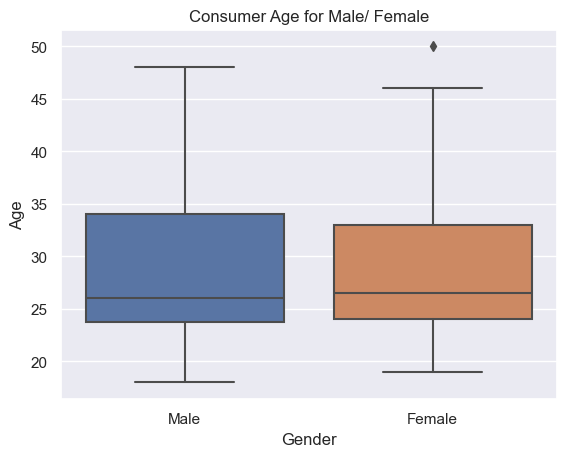

In [122]:
# Boxplot to compare the age of consumers wrt Gender

plt.title('Consumer Age for Male/ Female')
sns.set_theme()
sns.boxplot(x='Gender',y='Age',data=df)
plt.show()

- The median age for male consumers and female consumers is equal i.e. 26.
- There are no outliers for male. We can see outliers for female and also note 
  that the oldest consumer to purchase a treadmill is female (50 years old).

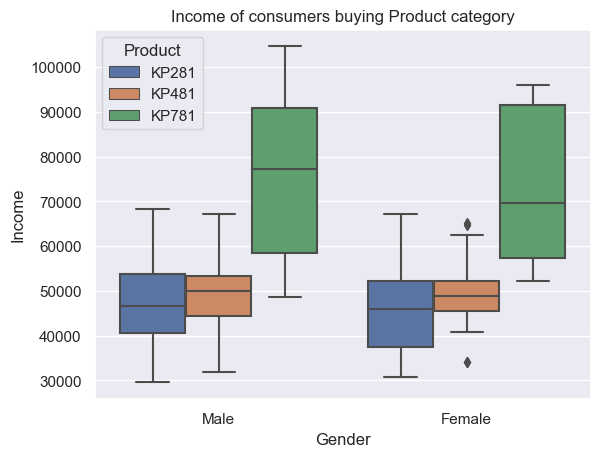

In [279]:
# Boxplot to check the income of consumers buying product

plt.title("Income of consumers buying Product category")
sns.boxplot(x="Gender",y="Income",hue="Product",data=df)
plt.show()

- Consumers with high income buy KP781
- Median income for male and female consumers buying KP281 and KP481 is same.

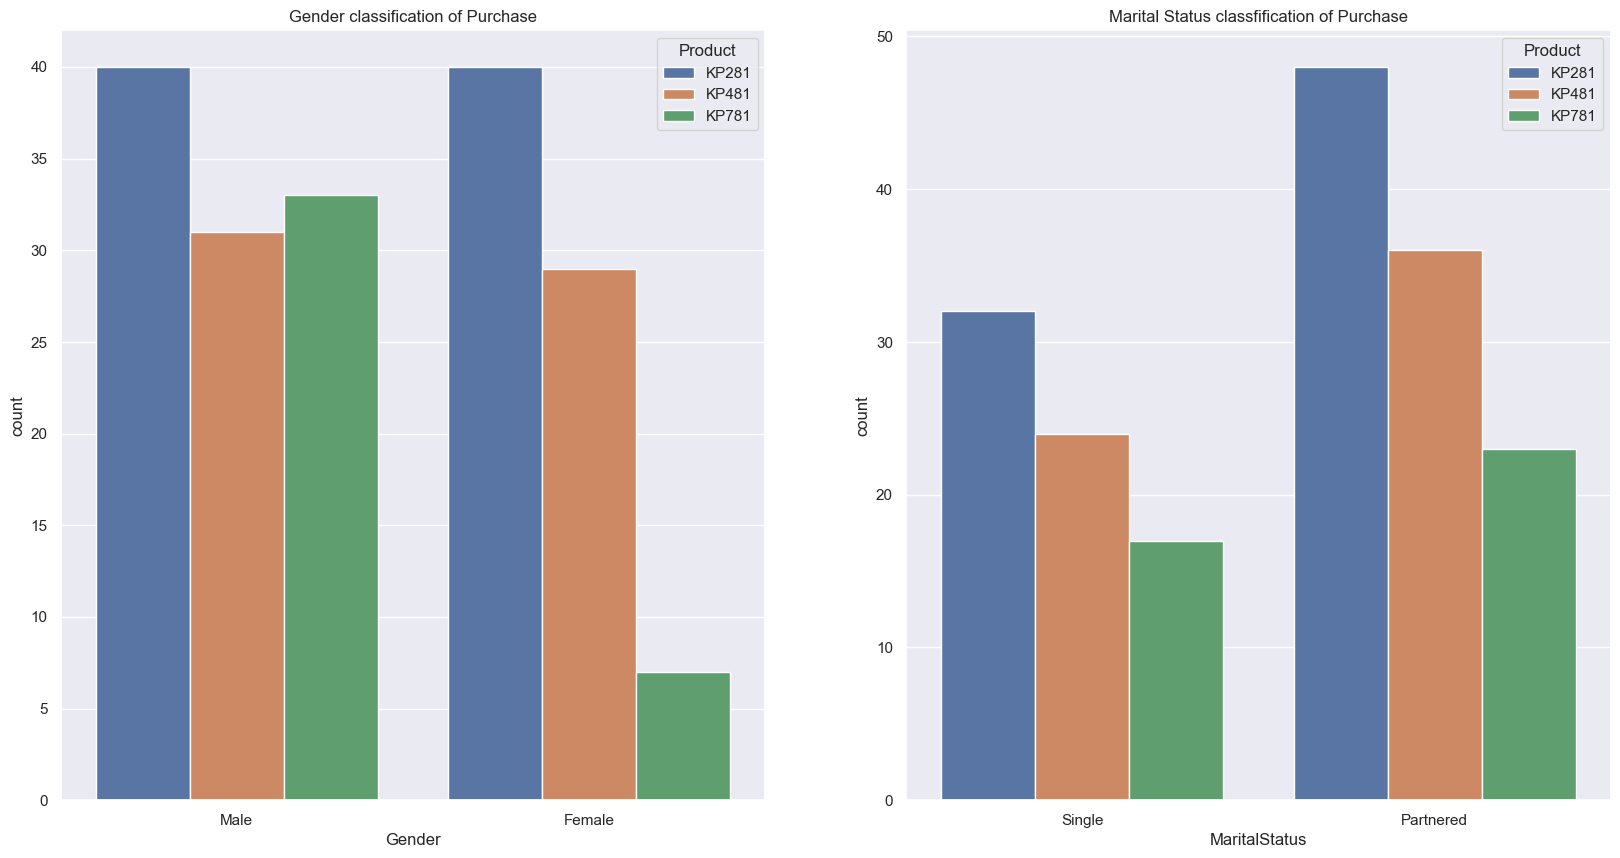

In [149]:
# Countplot to compare the products bought by consumers based on gender and marital status

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Gender classification of Purchase')
sns.countplot(x="Gender",hue="Product",data=df)

plt.subplot(1,2,2)
plt.title('Marital Status classfification of Purchase')
sns.countplot(x="MaritalStatus",hue="Product",data=df)

plt.show()

- By generating a countplot, we observe that KP281 is the most bought product and KP781 is the least bought product.
- Though, males are buying KP781 more than KP481 which is not the case in females.
- Consumers with marital status as 'Partnered' are buying more than 'Single'.

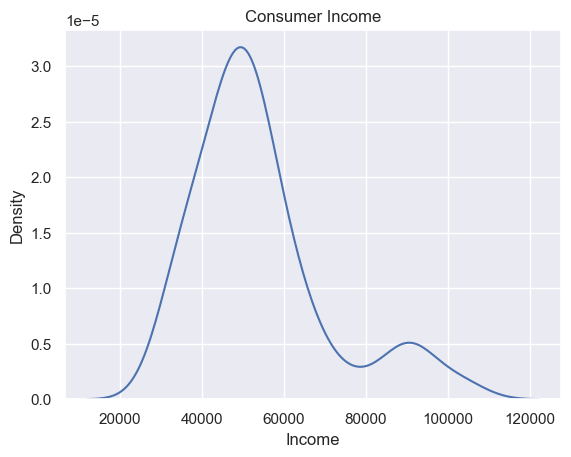

In [144]:
# KDEplot to find the income of consumers

plt.title('Consumer Income')
sns.kdeplot(df["Income"])
plt.show()

- By plotting KDEplot, we can see that high number of consumers who lies in the income range of 40K-60K.
- Ther is also a slight increase when income range is between 85k-95k

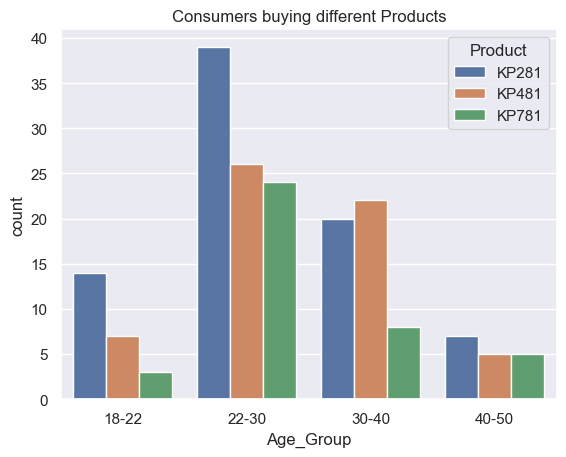

In [145]:
# Countplot to find the age of consumers buying different products

plt.title('Consumers buying different Products')
sns.countplot(x="Age_Group",hue="Product",data=df)
plt.show()

- It is observed that consumers in the age bracket of 22-30 are buying the most.
- KP281 is clearly the choice of product for consumers having age 18-30.
- KP481 is bought by most of consumers in the age bracket 30-40.
- To be noted, sales of K781 is equal to KP481 in the age bracket 40-50

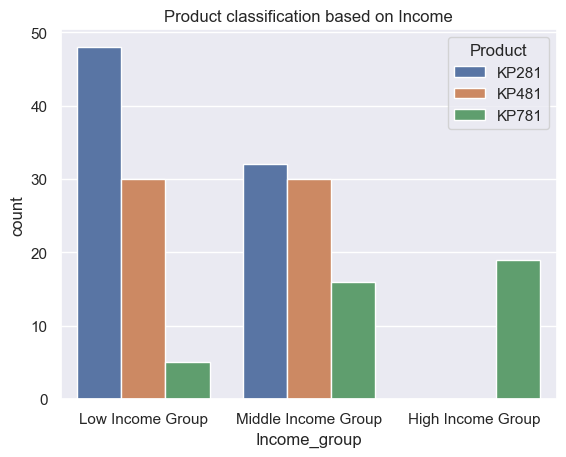

In [181]:
# Countplot to find what products are being purchased by various income groups

plt.title('Product classification based on Income')
sns.countplot(x="Income_group",hue="Product",data=df)
plt.show()

- Lower income group buy KP281 and very few of them buy KP781.
- Middle Income group tend to buy KP281 and KP481.
- Interestingly, higher income group are purchasing only KP781.

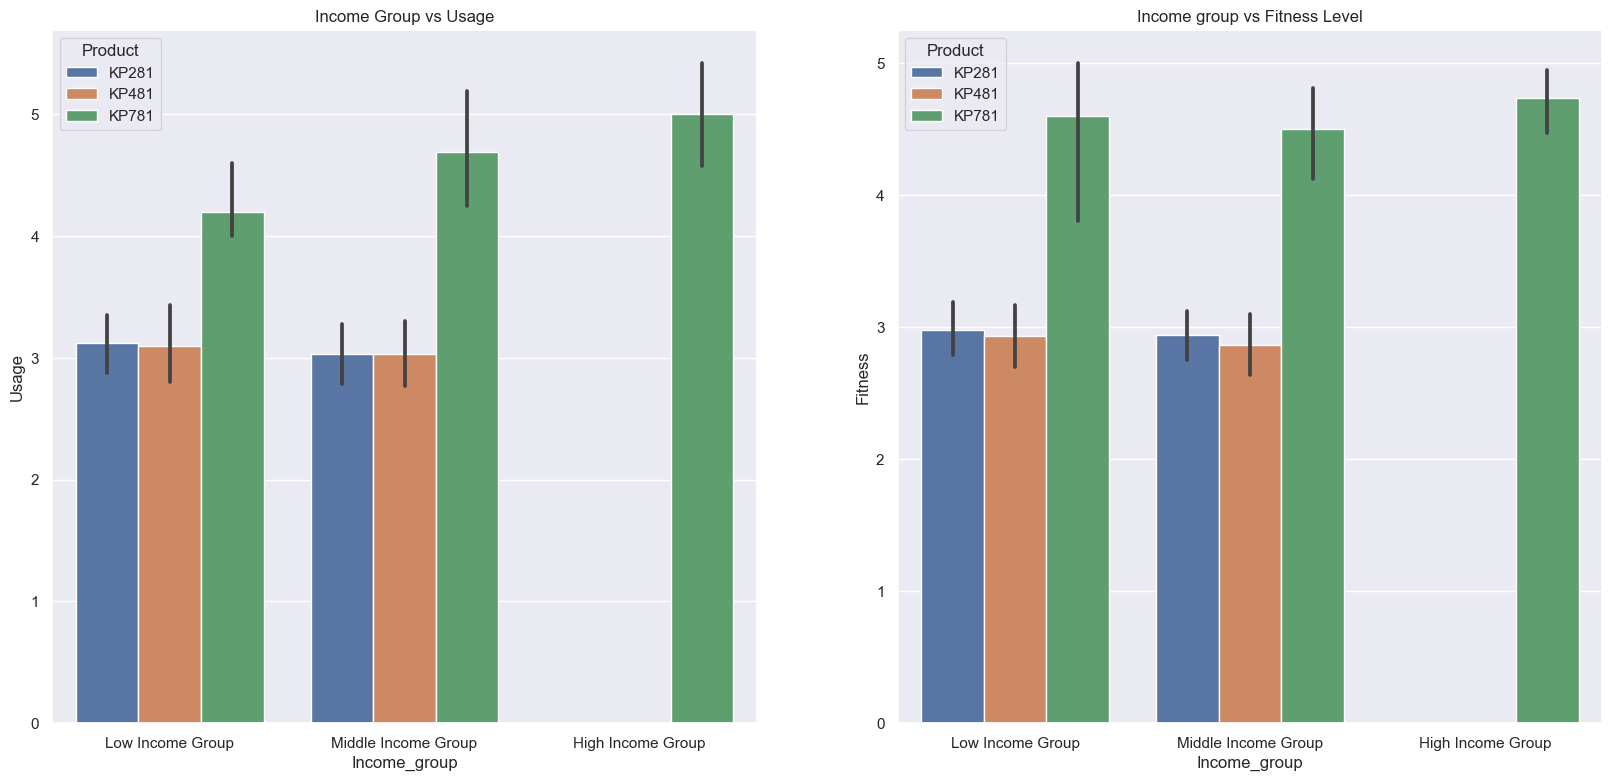

In [194]:
# Barplot to compare the fitness and usage of products wrt Income groups

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title('Income Group vs Usage')
sns.barplot(x="Income_group",y="Usage",hue="Product",data=df,estimator=np.mean)

plt.subplot(1,2,2)
plt.title('Income group vs Fitness Level')
sns.barplot(x="Income_group",y="Fitness",hue="Product",data=df,estimator=np.mean)

plt.show()

- Customers belonging to Low and middle income group use KP281 and KP481 on an average 3 days a week.
- While the customers from same group having KP781 use it for more than 4 days a week and high income group owners
  use KP781 for 5 days a week on an average.

- Similarly, customers using the product for 3 days have average fitness level while customers using
  KP781 have a fitness level of 4 and above.

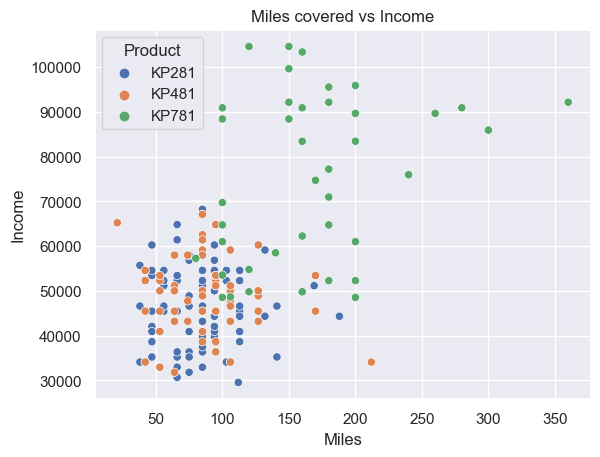

In [202]:
# Scatterplot to compare the fitness and usage of products wrt Income groups

plt.title('Miles covered vs Income')
sns.scatterplot(y="Income",x="Miles",hue="Product",data=df)
plt.show()

- Consumers with low income tend to buy KP281 and KP481 more than KP781.
  They cover less miles as compare to high Income consumers.
- High Income group consumers buy KP781 and cover more miles.

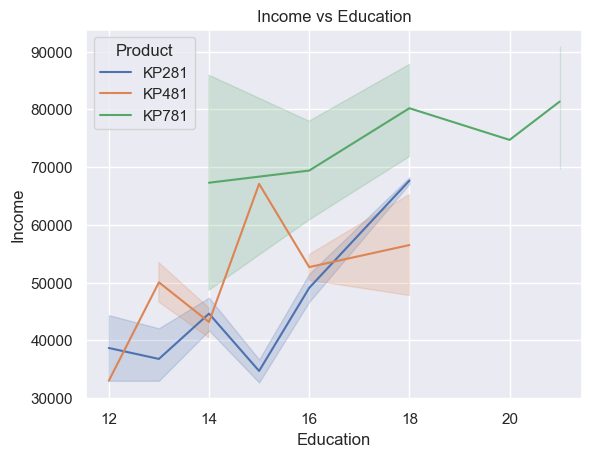

In [215]:
# Lineplot to compare the Income of consumers with years of Education 

plt.title("Income vs Education")
sns.lineplot(y="Income",x="Education",data=df,hue="Product")
plt.show()

- Consumers who have education of 12-14 years primarily buy KP281 and KP481. Also, theu fill in low income group.
- Consumers who have education of 16 years or more bought KP781 more than other products and they
  also have higher income as compared to others.

C:\Users\samaksharma\AppData\Local\Temp\ipykernel_17536\2778448292.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="coolwarm",annot=True)


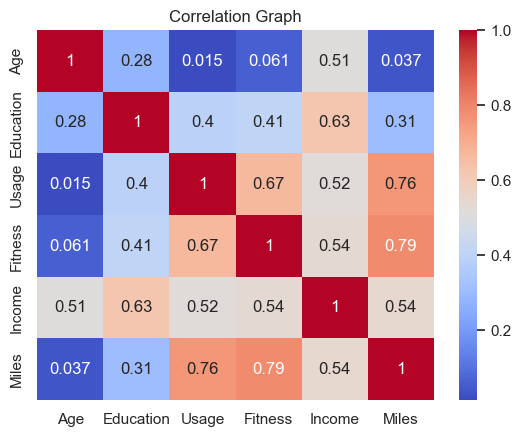

In [217]:
# Heatmap to check the correlation among variables

plt.title('Correlation Graph')
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)
plt.show()

- Highly educated consumers have high income, usage of product is high and thereby they score high on fitness scale.
- Consumers who use this product more belong to high income group and thereby are more fit.
- As we conclude, consumers belonging to higher income group use the treadmill more and thereby are 
  more fit

# 4. Missing Value & Outlier Detection

In [237]:
# Detect Missing values

df.isna().sum()

Product           0
Age               0
Gender            0
Education         0
MaritalStatus     0
Usage             0
Fitness           0
Income            0
Miles             0
Usage_Category    0
Income_group      0
Age_Group         0
Stamina           0
dtype: int64

- As we see in the output, there are no missing values in the dataset

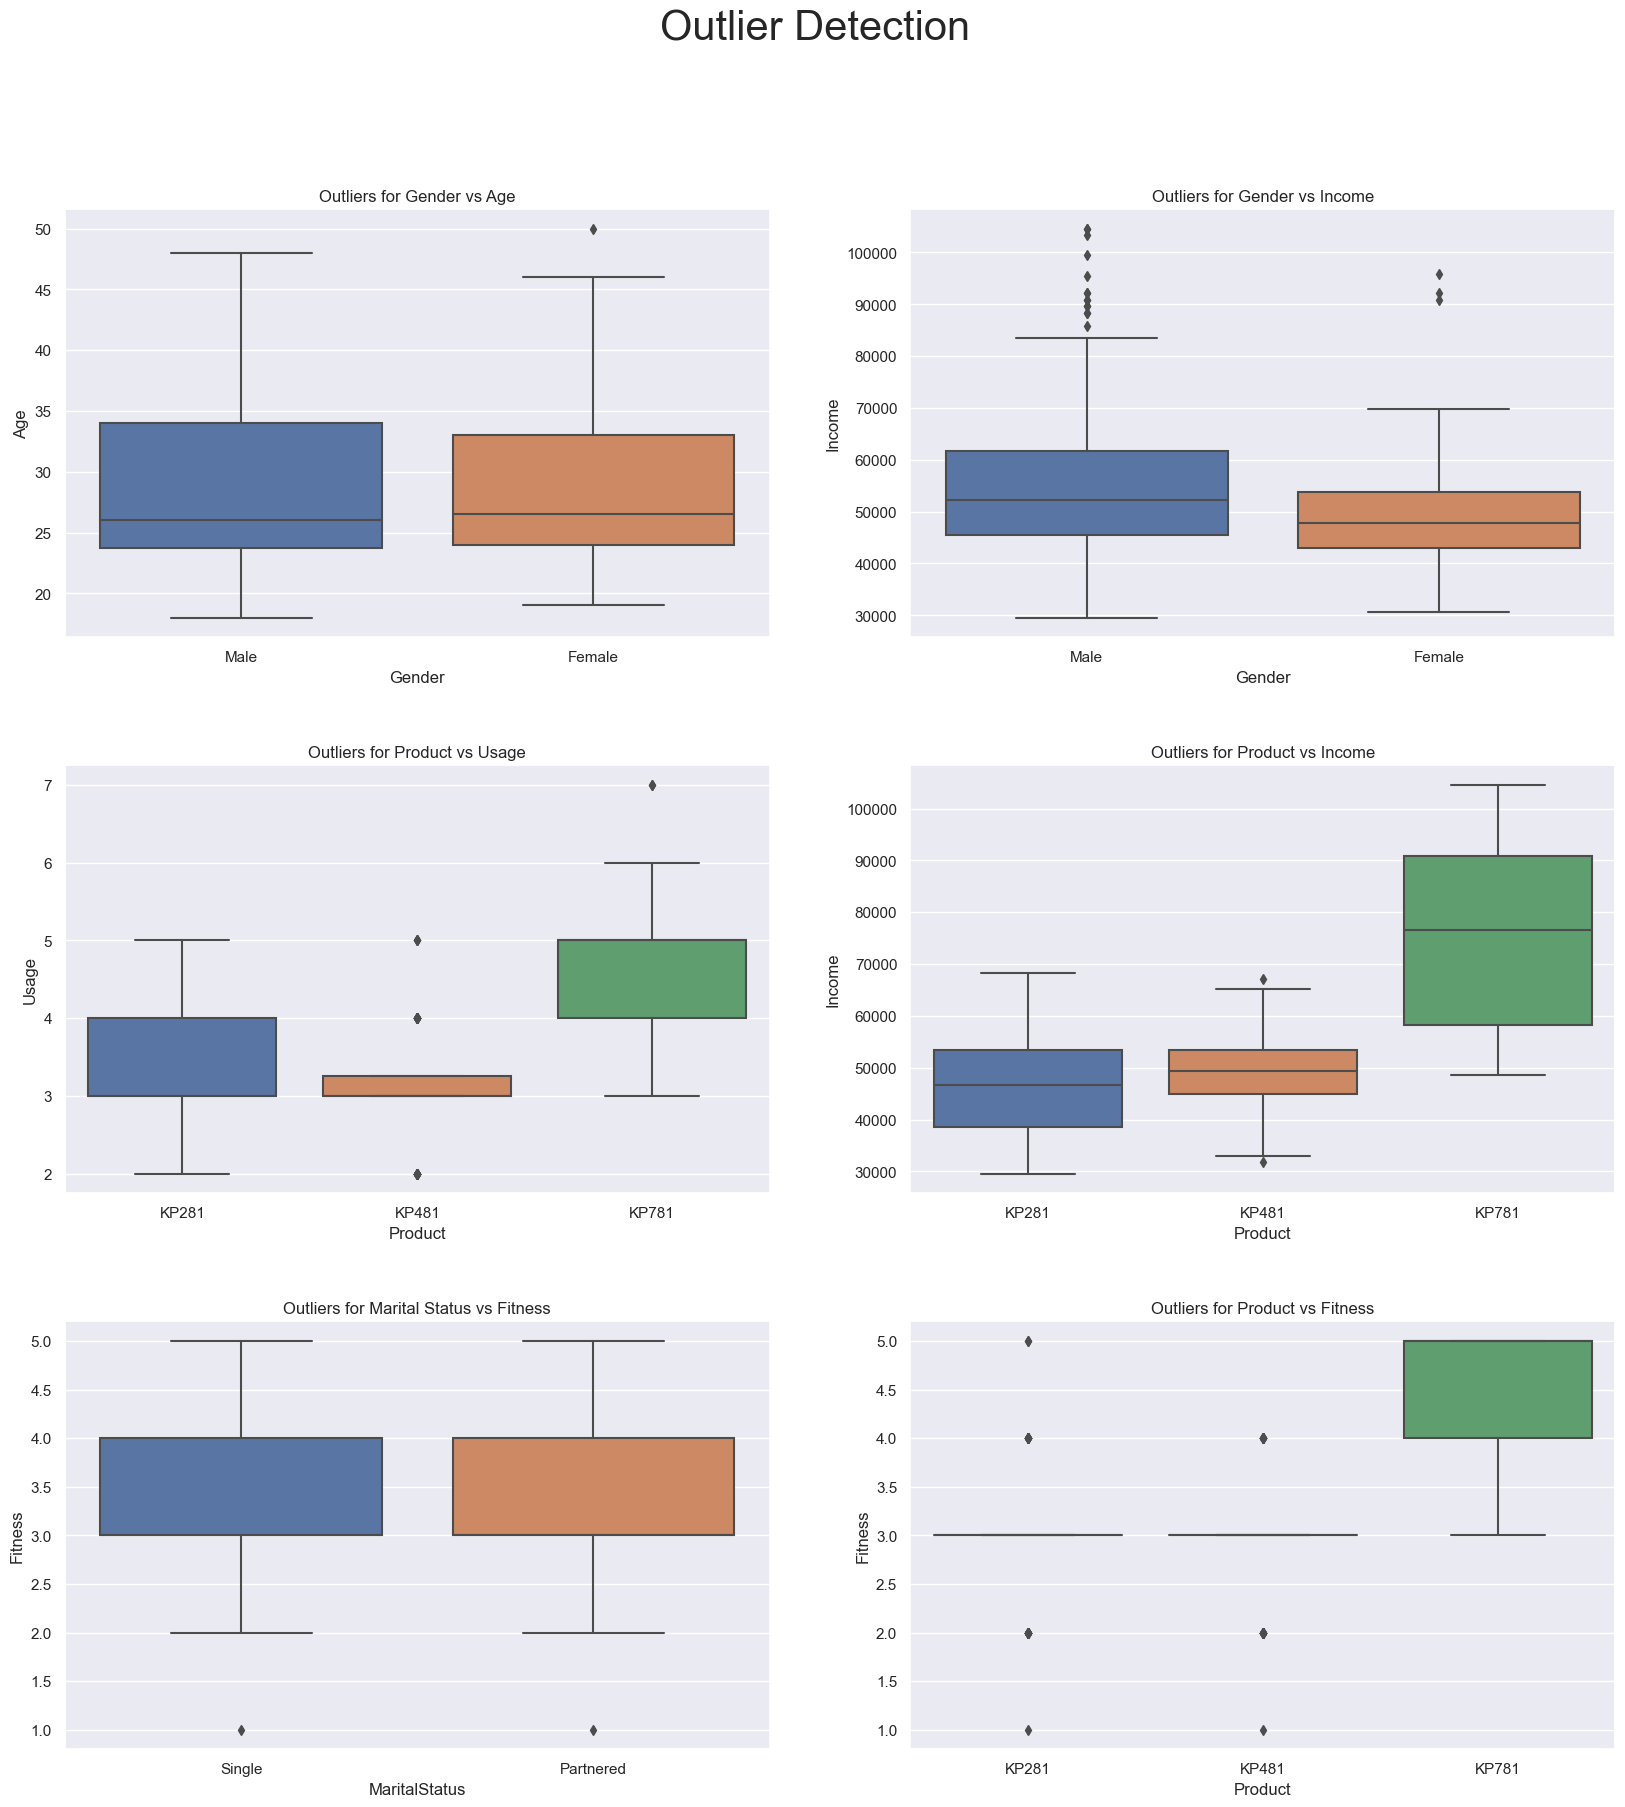

In [273]:
# Boxplot to detetct outliers from the median value

plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.title("Outliers for Gender vs Age")
sns.boxplot(x="Gender",y="Age",data=df)

plt.subplot(3,2,2)
plt.title("Outliers for Gender vs Income")
sns.boxplot(x="Gender",y="Income",data=df)

plt.subplot(3,2,3)
plt.title("Outliers for Product vs Usage")
sns.boxplot(x="Product",y="Usage",data=df)

plt.subplot(3,2,4)
plt.title("Outliers for Product vs Income")
sns.boxplot(x="Product",y="Income",data=df)

plt.subplot(3,2,5)
plt.title("Outliers for Marital Status vs Fitness")
sns.boxplot(x="MaritalStatus",y="Fitness",data=df)

plt.subplot(3,2,6)
plt.title("Outliers for Product vs Fitness")
sns.boxplot(x="Product",y="Fitness",data=df)

plt.suptitle('Outlier Detection', fontsize=30)
plt.subplots_adjust(hspace=0.3)
plt.show()

- There are no outliers for males wrt age. Though, we have female consumers who are outliers wrt age.
- The median income of males is more than females. There are lot of outliers for high group income males
  as compared to females.
- There are outliers for KP781 consumers who use the product 7 days a week. Based on usage, KP481 has
  outliers on the higher and lower usage.
- There are no outliers for income of consumers buying KP281 and KP781. Also, consumers buying KP781
  have a higher median income as compared to KP281 and KP481.
- There is no difference in fitness level of consumers wrt marital status.
- There are consumers buying KP281 and KP481 and have fitness level higher as compared to the others.
  KP781 consumers are highly fit and no outliers detected.

# 5. Business Insights based on Non-Graphical and Visual Analysis

# Probability Distribution

In [291]:
# Marginal probablity of customer buying Product

df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

- Probablity of a customer buying KP281, KP481 and KP781 is 0.44, 0.33 and 0.22 respectively.

In [292]:
# Conditional probablity of customers based on gender buying Product

pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


- There is a higher probablity that a female customer will buy KP281(0.52) and very low probability that she will buy KP781.
- This is not the case with males. Males have a high probability of buying KP281 or KP781.

In [293]:
# Conditional probablity of customers based on marital status buying Product

pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True,normalize='index')

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222


- There is not much difference in probability of customers based on marital status buying a specific product.

In [296]:
# Conditional probablity of customers using the kind of Product

pd.crosstab(index=df['Usage'],columns=df['Product'],margins=True,normalize='columns')

Product,KP281,KP481,KP781,All
Usage,,,,
2,0.2375,0.233333,0.000,0.183333
3,0.4625,0.516667,0.025,0.383333
4,0.2750,0.200000,0.450,0.288889
5,0.0250,0.050000,0.300,0.094444
6,0.0000,0.000000,0.175,0.038889
7,0.0000,0.000000,0.050,0.011111


- Customers buying KP281 or KP481 use the product for 2-4 days/ week.
- If a customer is using the treadmill for more than 4 days a week, there is a high probability that they are using KP781.

In [297]:
# Conditional probablity of customers fitness level using the kind of Product

pd.crosstab(index=df['Fitness'],columns=df['Product'],margins=True,normalize='columns')

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.0125,0.016667,0.000,0.011111
2,0.1750,0.200000,0.000,0.144444
3,0.6750,0.650000,0.100,0.538889
4,0.1125,0.133333,0.175,0.133333
5,0.0250,0.000000,0.725,0.172222


- Customers buying KP281 or KP481 will have a probability of 0.65-0.67 that they have average fitness level.
- There is 0.72 (very high) probability of customers buying KP781 to score highest on the fitness scale.

In [306]:
# Conditional probablity of customers purchasing a product belonging to a particular income group

pd.crosstab(index=df['Income_group'],columns=df['Product'],margins=True,normalize='columns')

Product,KP281,KP481,KP781,All
Income_group,,,,
Low Income Group,0.6,0.5,0.125,0.461111
Middle Income Group,0.4,0.5,0.400,0.433333
High Income Group,0.0,0.0,0.475,0.105556


- Low income and middle income consumers will opt for KP281 or KP781. Probability is 0.5 for KP781 and low income group
  users will but more KP281 (0.6 probability)
- There is a very high probability that KP781 will be purchased by high income group (0.48) or medium income group (0.4)

In [299]:
# Conditional probablity of customers purchasing a product having stamina. Consumers are grouped into stamina levels
# based on the miles they run/ walk. This is done in Step 1 of this case study.

pd.crosstab(index=df['Stamina'],columns=df['Product'],margins=True,normalize='columns')

Product,KP281,KP481,KP781,All
Stamina,,,,
Low,0.225,0.200000,0.000,0.166667
Average,0.550,0.533333,0.025,0.427778
High,0.225,0.250000,0.700,0.338889
Very High,0.000,0.016667,0.275,0.066667


- There is a 0.5 probability that consumers buying KP281 or KP481 will have average stamina.
- There is a 0.97 probability (high) that consumers buying KP781 will have a higher stamina.

In [300]:
# Conditional probablity of customers education level using the kind of Product

pd.crosstab(index=df['Education'],columns=df['Product'],margins=True,normalize='columns')

Product,KP281,KP481,KP781,All
Education,,,,
12,0.0250,0.016667,0.000,0.016667
13,0.0375,0.033333,0.000,0.027778
14,0.3750,0.383333,0.050,0.305556
15,0.0500,0.016667,0.000,0.027778
16,0.4875,0.516667,0.375,0.472222
18,0.0250,0.033333,0.475,0.127778
20,0.0000,0.000000,0.025,0.005556
21,0.0000,0.000000,0.075,0.016667


- Consumers buying KP281 or KP481 will have high probability that they have education of 14 or 16 years.
- Consumers buying KP781 will have 0.85 probability that they have completed education of 16 or 18 years.

# Insights based on Analysis

- KP281 is the most high selling contributing to 44.4% of the total followed by KP481 and KP781.
- Male customers tend to buy KP781 more as compared to females. This can be due to the fact the median income of females
  in high income group is lesser as compared to males.
- High income group consumers have a high probability of buying KP781
- Consumers buying KP781 use the product for 4 or more days/ week. Since, high income group consumers have a higher ratio
  of buying KP781, they report higher fitness levels and high stamina.
- Customers who have education of 16 years or more report higher income and have higher fitness level and are inclined
  to buy KP781.
- There is a good probability that customers in age bracket of 30-40 will buy KP481.
- Consumer with age range 23-30 are major buyers of this product followed by 30-40.
- Consumers in the age range of 18-22 primarily buy KP281 as their income levels are low. There is an equal probability
  of consumer in the age bracket of 30-40 buying a KP481 or KP781 due to higher incomes.
- There is no major difference in types of consumers buying KP281 or KP481.
- Most of the consumers buying Aerofit products have an income in the range of 40K-60K

# 6. Recommendations

- KP281 is the most sought product followed by KP481 and KP781. If the profit margin in KP481 is less, then this
  should be discontinued as there is no difference in customer profile.
- Aerofit can lower the cost of KP781 so that more low and middle income group consumers can buy the product. This
  will lead to more usage and increased fitness levels of all consumers. Currently, only high income group consumers
  have a higher usage and fitness level.
- There is just 9% probability that a female will buy KP781 as compared to 31% for males. More promotion offers should be
  given to female consumers so that KP781 sales can also go high.